# **CIS 5450 Final Project - Used Car Prices Prediction**
*Feng Jiang, Jiayi Chen, Amber Yan*

# Part 1: Introduction

### Introduction: Predicting Used Car Prices

The automotive industry has witnessed a significant transformation over the past decade, with the used car market growing rapidly due to increasing demand for affordable vehicles. Pricing used cars accurately is a challenging task due to the variety of factors influencing the price, such as brand, mileage, engine specifications, condition, and market trends. This project aims to build a robust predictive model to estimate the price of used cars based on their features.

By leveraging machine learning techniques and domain knowledge, this project seeks to provide an efficient and scalable solution for predicting car prices. The insights derived from this project can benefit various stakeholders, including:
- **Consumers**: Empowering buyers and sellers to make informed decisions.
- **Dealerships**: Assisting in inventory management and pricing strategies.
- **Online Marketplaces**: Enhancing user experience with accurate price recommendations.

### Objectives
1. **Understand the Data**: Analyze the features and identify key factors influencing car prices.
2. **Preprocess the Data**: Clean and engineer features to create a high-quality dataset suitable for machine learning.
3. **Build Predictive Models**: Use statistical and machine learning models to predict car prices.
4. **Evaluate Performance**: Assess models using appropriate metrics and refine them for better accuracy.
5. **Provide Insights**: Generate actionable insights into the factors driving car prices and their relative importance.

This project combines exploratory data analysis, feature engineering, and predictive modeling to deliver an effective solution. With a focus on transparency and scalability, the outcome is expected to provide a practical tool for pricing used cars while gaining deeper insights into the dynamics of the used car market.

# Part 2: Data Loading & Preprocessing

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgbm

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.1 Loading + Preprocessing Used Car Price Data

We downloaded the used car prices datasets from kaggle: https://www.kaggle.com/competitions/playground-series-s4e9/overview

### Loading data into Pandas Dataframe

In [ ]:
#Google Drive file paths
path = '/content/drive/MyDrive/5450_project_datasets/train.csv'

In [ ]:
#Load the datasets
df = pd.read_csv(path)

In [ ]:
print('Dataset shape: ',df.shape)

Dataset shape:  (188533, 13)


### EDA

In [ ]:
#Display the first 5 rows of the dataset
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
#Display the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
#Display some descriptive statistics of numerical data
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


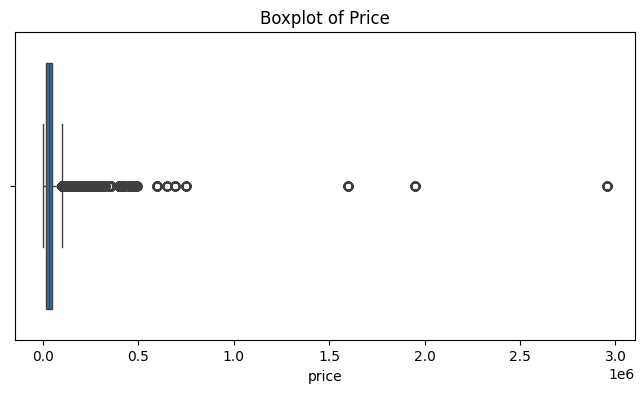

In [ ]:
# Boxplot for Price
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

Since the price has outliers with extremely high values, we will remove the outliers and plot the boxplot again.

In [ ]:
#Remove the outliers

# Calculate IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

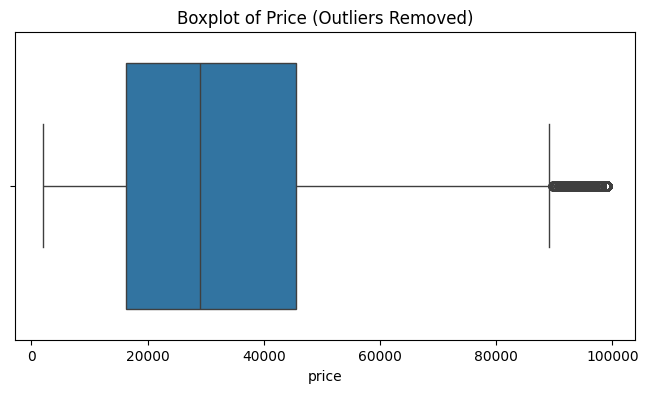

In [ ]:
# Boxplot of price after removing outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (Outliers Removed)')
plt.show()

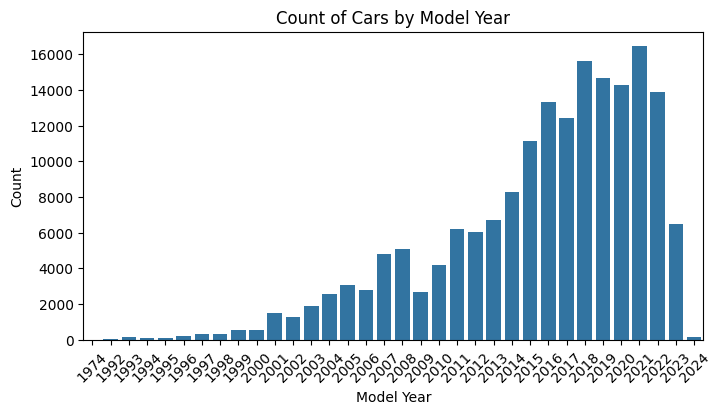

In [ ]:
# Countplot for Model Year
years = sorted(df['model_year'].unique())
plt.figure(figsize=(8, 4))
sns.countplot(x='model_year', data=df, order=years)
plt.title('Count of Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

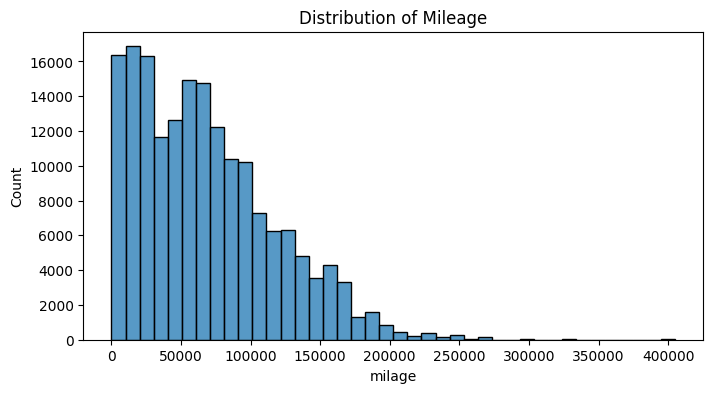

In [ ]:
# Histogram for Mileage
plt.figure(figsize=(8, 4))
sns.histplot(df['milage'], bins=40)
plt.title('Distribution of Mileage')
plt.show()

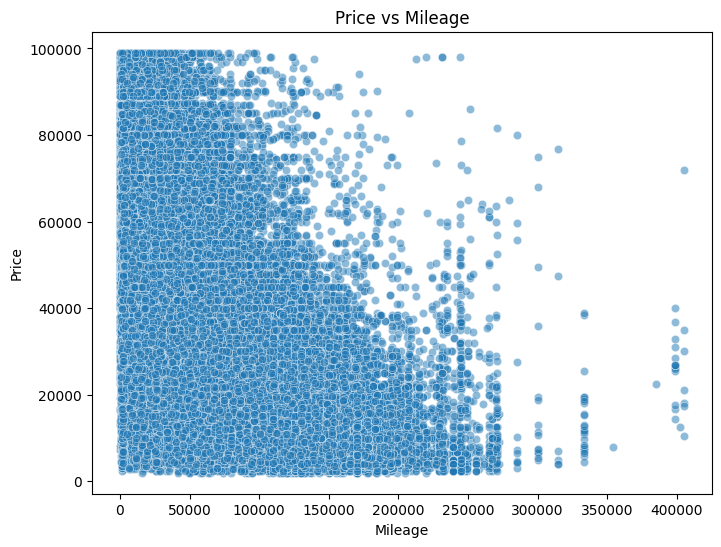

In [ ]:
# Scatterplot: Mileage vs Price (outliers removed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='milage', y='price', data=df, alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

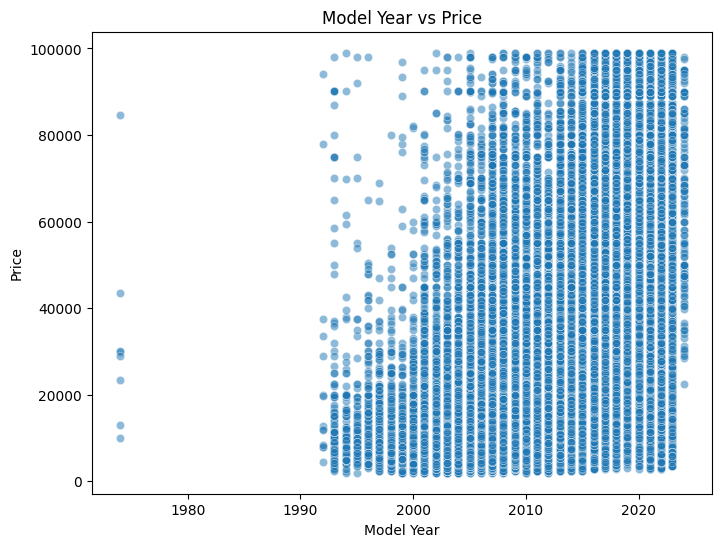

In [ ]:
# Scatterplot: Model Year vs Price (outlier removed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='model_year', y='price', data=df, alpha=0.5)
plt.title('Model Year vs Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

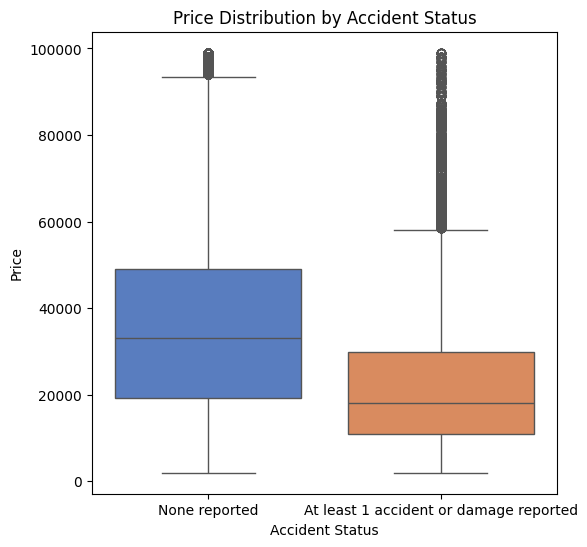

In [ ]:
#Box plot: Accident Status vs. Price (outliers removed)
plt.figure(figsize=(6, 6))
sns.boxplot(x='accident', y='price', data=df, palette='muted')
plt.title('Price Distribution by Accident Status')
plt.xlabel('Accident Status')
plt.ylabel('Price')
plt.show()

### Data Cleaning and Feature Engineering

In [ ]:
cleaned_df = df.copy()

#### 1. Calculating Cars' Age and Mileage per Year
- **Why?**
  - These features help capture the relationship between the car's age, usage, and its price.
  - Age reflects depreciation over time, while mileage per year provides a normalized indicator of wear and tear.
- **How?**
  - `age`: Calculated as the difference between the current year and the car's model year.
  - `mileage_per_year`: Computed to assess how much the car is used annually, normalizing mileage by age.


In [ ]:
#Calculate the cars' age and milage per year
current_year = datetime.now().year
cleaned_df['age'] = current_year - cleaned_df['model_year']
cleaned_df['mileage_per_year'] = cleaned_df['milage'] / cleaned_df['age']
cleaned_df['mileage_per_year'] = np.where(
    (cleaned_df['age'] == 0) | (cleaned_df['model_year'] == current_year),
    cleaned_df['milage'],
    cleaned_df['milage'] / cleaned_df['age']
)

#### 2. Extracting Meaningful Features from the `engine` Column
- **Why?**
  - The `engine` column contains rich information like horsepower, engine size, and the number of cylinders. These are critical determinants of a car's performance and hence its value.
- **How?**
  - Regular expressions are used to extract `horse_power`, `engine_size`, and `cylinders` into separate numerical columns.
  - Handling missing or ambiguous values ensures data consistency.


In [ ]:
cleaned_df['engine'].head()

,engine
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel


In [ ]:
# Extract meaningful features from 'engine': horse_power, engine_size, cylinders
cleaned_df['engine'] = cleaned_df['engine'].replace(['–'], np.nan)
cleaned_df['horse_power'] = cleaned_df['engine'].str.extract(r'(\d+)\.0HP').astype(float)
cleaned_df['engine_size'] = cleaned_df['engine'].str.extract(r'(\d+\.\d+)\s*(?:L|Liter)', expand=False)
cleaned_df['engine_size'] = pd.to_numeric(cleaned_df['engine_size'], errors='coerce')
## All electric vehicle like Tesla has empty engine_size value
cleaned_df['cylinders'] = cleaned_df['engine'].str.extract(r'(\d+)\s*Cylinder', expand=False)
cleaned_df['cylinders'] = cleaned_df['cylinders'].fillna(
    cleaned_df['engine'].str.extract(r'V(\d+)', expand=False)
)
cleaned_df['cylinders'] = cleaned_df['cylinders'].fillna(
    cleaned_df['engine'].str.extract(r'I(\d+)', expand=False)
)
cleaned_df['cylinders'] = pd.to_numeric(cleaned_df['cylinders'], errors='coerce').astype('Int64')

#### 3. Cleaning and Encoding the `fuel_type` Column
- **Why?**
  - Fuel type is a categorical variable (e.g., gasoline, electric, etc.) that significantly affects price due to differences in cost-efficiency and maintenance.
  - Properly classifying and cleaning this column ensures consistent data for modeling.
- **How?**
  - Missing or unsupported values are replaced with `NaN`.
  - Specific rules are applied for electric vehicles (e.g., Tesla) to set `fuel_type` to `Electric`.


In [ ]:
cleaned_df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
#Clean the fuel_type column
cleaned_df['fuel_type'] = cleaned_df['fuel_type'].replace(['–', 'not supported'], np.nan)
cleaned_df.loc[cleaned_df['brand'] == 'Tesla', 'fuel_type'] = 'Electric'
cleaned_df.loc[cleaned_df['engine'].str.contains('electric', case=False, na=False), 'fuel_type'] = 'Electric'
cleaned_df.loc[cleaned_df['engine'].str.contains('gasoline', case=False, na=False), 'fuel_type'] = 'Gasoline'

#### 4. Encoding Binary Categorical Features
- **Why?**
  - Many machine learning models require numerical inputs. Encoding categorical features like `clean_title` and `accident` allows them to be used effectively in models.
- **How?**
  - Binary features (`clean_title`, `accident`) are converted to `0` and `1` for modeling simplicity and consistency.
  - We will encode more categorical features in the later part.


In [ ]:
#Encode the binary categorical feature
cleaned_df['clean_title'] = np.where(cleaned_df['clean_title'] == 'Yes', 1, 0)
cleaned_df['accident'] = cleaned_df['accident'].map({
    'None reported': 0,
    'At least 1 accident or damage reported': 1
})

#### 5. Mapping Colors to Standardized Categories
- **Why?**
  - The `ext_col` (exterior color) column has a wide variety of values, including synonyms (e.g., `black`, `onyx`) and inconsistent formatting.
  - Standardizing these to a fixed set of categories helps reduce noise and improves interpretability.
- **How?**
  - Synonyms are mapped to a single category using predefined color groups.
  - Missing or ambiguous values are replaced with an `Other` category.

In [ ]:
print("Number of unique value in 'ext_col':", cleaned_df['ext_col'].nunique())
print("Number of unique value in 'int_col':", cleaned_df['int_col'].nunique())

Number of unique value in 'ext_col': 318
Number of unique value in 'int_col': 156


In [ ]:
#Map the colors to standard colors
standard_colors = [
    'Black', 'White', 'Gray', 'Grey', 'Silver', 'Blue', 'Red', 'Green',
    'Gold', 'Brown', 'Orange', 'Beige', 'Yellow', 'Purple'
]

color_mapping = {
    'Black': [
        'black', 'noir', 'obsidian', 'ebony', 'onyx', 'raven', 'nero', 'phantom',
        'carbon', 'shadow', 'midnight', 'beluga', 'dark matter', 'jet black',
        'global black', 'charcoal', 'graphite', 'anthracite', 'black sapphire',
        'black forest', 'vik black', 'orca black', 'vulcano black', 'satin black',
        'titan black', 'amg black', 'black onyx', 'obsidian black'
    ],

    'White': [
        'white', 'pearl', 'snowflake', 'frost', 'alpine', 'crystal white',
        'pure white', 'ice', 'ivory', 'oxford white', 'summit white', 'grace white',
        'ultra white', 'quartz white', 'eminent white', 'ibis', 'oryx', 'bianco',
        'chalk', 'moonlight', 'glacier white', 'diamond white', 'arctic white',
        'pristine white', 'balloon white', 'frozen white', 'mineral white',
        'carrara white', 'wind chill pearl'
    ],

    'Gray': [
        'grey', 'gray', 'granite', 'graphite', 'tungsten', 'slate', 'magnetic',
        'magnetite', 'nebula', 'storm', 'thunder', 'carpathian', 'chronos',
        'typhoon', 'donington', 'hampton', 'baltic', 'sonic', 'polymetal',
        'kemora', 'eiger', 'grigio', 'dark galvanized', 'medium earth gray',
        'medium stone', 'diesel gray', 'graystone', 'rock gray', 'medium pewter',
        'light slate', 'medium light camel', 'mistral gray'
    ],

    'Silver': [
        'silver', 'sterling', 'platinum', 'metallic', 'brilliant silver',
        'quicksilver', 'atomic silver', 'liquid platinum', 'iridium',
        'florett silver', 'silky silver', 'ironman silver', 'gt silver',
        'light platinum', 'light titanium'
    ],

    'Blue': [
        'blue', 'blu', 'pacific', 'azure', 'sapphire', 'ocean', 'navy',
        'aegean', 'antimatter blue', 'moonlight', 'phytonic', 'vega',
        'stormy sea', 'twilight blue', 'northsky', 'bayside', 'caspian',
        'fountain', 'hydro', 'caelum', 'horizon', 'rhapsody blue',
        'charles blue', 'cobalt blue'
    ],

    'Red': [
        'red', 'rosso', 'ruby', 'crimson', 'scarlet', 'maroon', 'garnet',
        'cardinal', 'burgundy', 'wine', 'firecracker', 'firenze', 'matador',
        'cayenne', 'passion', 'sangria', 'octane red', 'delmonico', 'infrared',
        'remington', 'hyper red', 'rioja red', 'adrenaline red', 'pimento red',
        'classic red', 'deep garnet'
    ],

    'Brown': [
        'brown', 'mocha', 'tan', 'coffee', 'chestnut', 'kodiak', 'sandstone',
        'dune', 'cobra beige', 'sarder brown', 'aragon brown', 'brandy',
        'espresso', 'caramel', 'saddle brown', 'mountain brown', 'deep chestnut',
        'dark auburn', 'nougat brown', 'cocoa'
    ],

    'Beige': [
        'beige', 'cream', 'ivory', 'sand', 'ecru', 'taupe', 'canberra beige',
        'pearl beige', 'shara beige', 'saiga beige', 'sahara tan', 'almond beige',
        'sand beige', 'whisper beige', 'parchment', 'oyster', 'cashmere'
    ],

    'Green': [
        'green', 'verde', 'forest', 'emerald', 'olive', 'sage',
        'python green', 'jungle green', 'aventurine', 'agave green',
        'deep cypress', 'lizard green'
    ],

    'Orange': [
        'orange', 'amber', 'sunset', 'copper', 'mango', 'volcanic orange',
        'arancio', 'ember', 'sakhir orange', 'kyalami orange'
    ],

    'Gold': [
        'gold', 'bronze', 'champagne', 'amber', 'honey', 'burnished',
        'gt gold'
    ],

    'Yellow': [
        'yellow', 'canary', 'solar', 'hellayella', 'silician yellow',
        'giallo taurus'
    ],

    'Purple': [
        'purple', 'plum', 'violet', 'amethyst', 'majestic plum',
        'ametrin', 'orchid'
    ]
}

In [ ]:
#Function for standardizing the colors
def standardize_color(color_name):
    if pd.isna(color_name) or color_name == '–' or color_name == '-':
        return 'Other'
    color_name = color_name.lower()

    # Check for two-tone colors
    if '/' in color_name:
        color_name = color_name.split('/')[0].strip()
    for std_color in color_mapping.keys():
        if std_color.lower() == color_name:
            return std_color
    for std_color, keywords in color_mapping.items():
        if any(keyword.lower() in color_name for keyword in keywords):
            return std_color

    return 'Other'

In [ ]:
#Standardize the ext_col (exterior color) and int_col (interior color)
cleaned_df['ext_col_cleaned'] = cleaned_df['ext_col'].apply(standardize_color)
cleaned_df['int_col_cleaned'] = cleaned_df['int_col'].apply(standardize_color)
print("\nExterior Color Mapping Results:")
print(cleaned_df['ext_col_cleaned'].value_counts())

print("\nInterior Color Mapping Results:")
print(cleaned_df['int_col_cleaned'].value_counts())


Exterior Color Mapping Results:
ext_col_cleaned
Black     51650
White     47180
Gray      25310
Silver    19659
Blue      14265
Red       10311
Green      2520
Gold       1645
Brown      1158
Orange     1076
Beige      1059
Yellow      941
Other       531
Purple      348
Name: count, dtype: int64

Interior Color Mapping Results:
int_col_cleaned
Black     107939
Beige      24621
Gray       21558
Brown       6118
Red         5022
Other       4986
White       4595
Orange       904
Blue         771
Silver       477
Gold         352
Green        252
Yellow        48
Purple        10
Name: count, dtype: int64


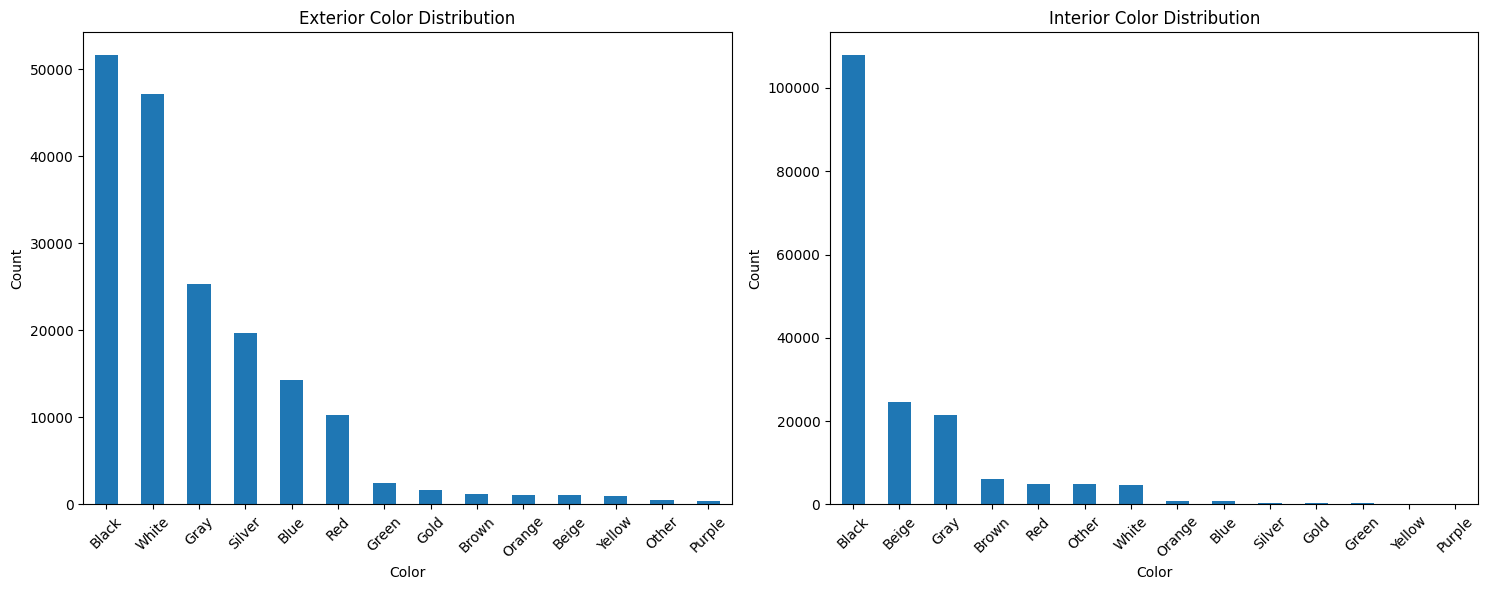

In [ ]:
#Exterior colors subplot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
ext_colors = cleaned_df['ext_col_cleaned'].value_counts()
ext_colors.plot(kind='bar')
plt.title('Exterior Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
##Interior colors subplot
plt.subplot(1, 2, 2)
int_colors = cleaned_df['int_col_cleaned'].value_counts()
int_colors.plot(kind='bar')
plt.title('Interior Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 6. Clean the Transmission column
- **Why?**
  - Transmission types (e.g., Automatic, Manual, CVT) are critical in influencing a car's price and usability.
  - Cleaning inconsistent transmission labels ensures uniformity and accurate categorization.

- **How?**
  - Labels containing "A/T" or "Automatic" are categorized as Automatic.
  - Labels containing "M/T" or "Manual" are categorized as Manual.
  - Labels containing "CVT" are categorized as CVT.
  - Any other labels are categorized as Other.

In [ ]:
cleaned_df['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '6-Speed Manual', '7-Speed Automatic',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '2', '6 Speed At/Mt', '5-Speed Automatic', '2-Speed Automatic',
       'Variable', '8-SPEED AT', '10-Speed Automatic with Overdrive',
       'Manual', '9-Speed Automatic with Auto-Shift', '–', '7-Speed',
       '7-Speed DCT Aut

In [ ]:
def clean_transmission(transmission):
    transmission = transmission.lower()

    # Automatic Transmission
    if ("a/t" in transmission or "automatic" in transmission or
        " at" in transmission or "shift" in transmission):
      return "Automatic"
    # Manual Transmission
    elif ("m/t" in transmission or "manual" in transmission or
          "speed mt" in transmission):
        return "Manual"

    # CVT (Continuously Variable Transmission)
    elif "cvt" in transmission:
        return "CVT"

    # Other
    else:
        return "Other"


cleaned_df['transmission_cleaned'] = cleaned_df['transmission'].apply(clean_transmission)

#### 7. Creating the `is_luxury` Feature
- **Why?**
  - Luxury brands (e.g., Mercedes-Benz, Tesla) often command higher prices, making this a valuable feature to capture luxury vs. non-luxury pricing trends.
- **How?**
  - A predefined list of luxury brands is used to classify cars as luxury (`1`) or non-luxury (`0`).


In [ ]:
luxury_brands = [
    'MINI', 'Lincoln', 'Genesis', 'Mercedes-Benz', 'Audi', 'BMW',
    'Tesla', 'Cadillac', 'Land', 'Porsche', 'McLaren', 'Lexus',
    'Jaguar', 'Acura', 'Rolls-Royce', 'Maserati', 'Bentley',
    'Ferrari', 'Aston', 'Lamborghini', 'Lucid', 'Lotus', 'Karma',
    'Bugatti', 'Polestar', 'Maybach'
]

cleaned_df['is_luxury'] = cleaned_df['brand'].apply(lambda x: 1 if x in luxury_brands else 0)

#### 8. Correlation Heatmap

We wanted to include a correlation heatmap to visualize the strength and direction of relationships between numerical variables in our dataset. This visualization helps identify potential predictive features, detect multicollinearity issues, and inform our feature engineering decisions.

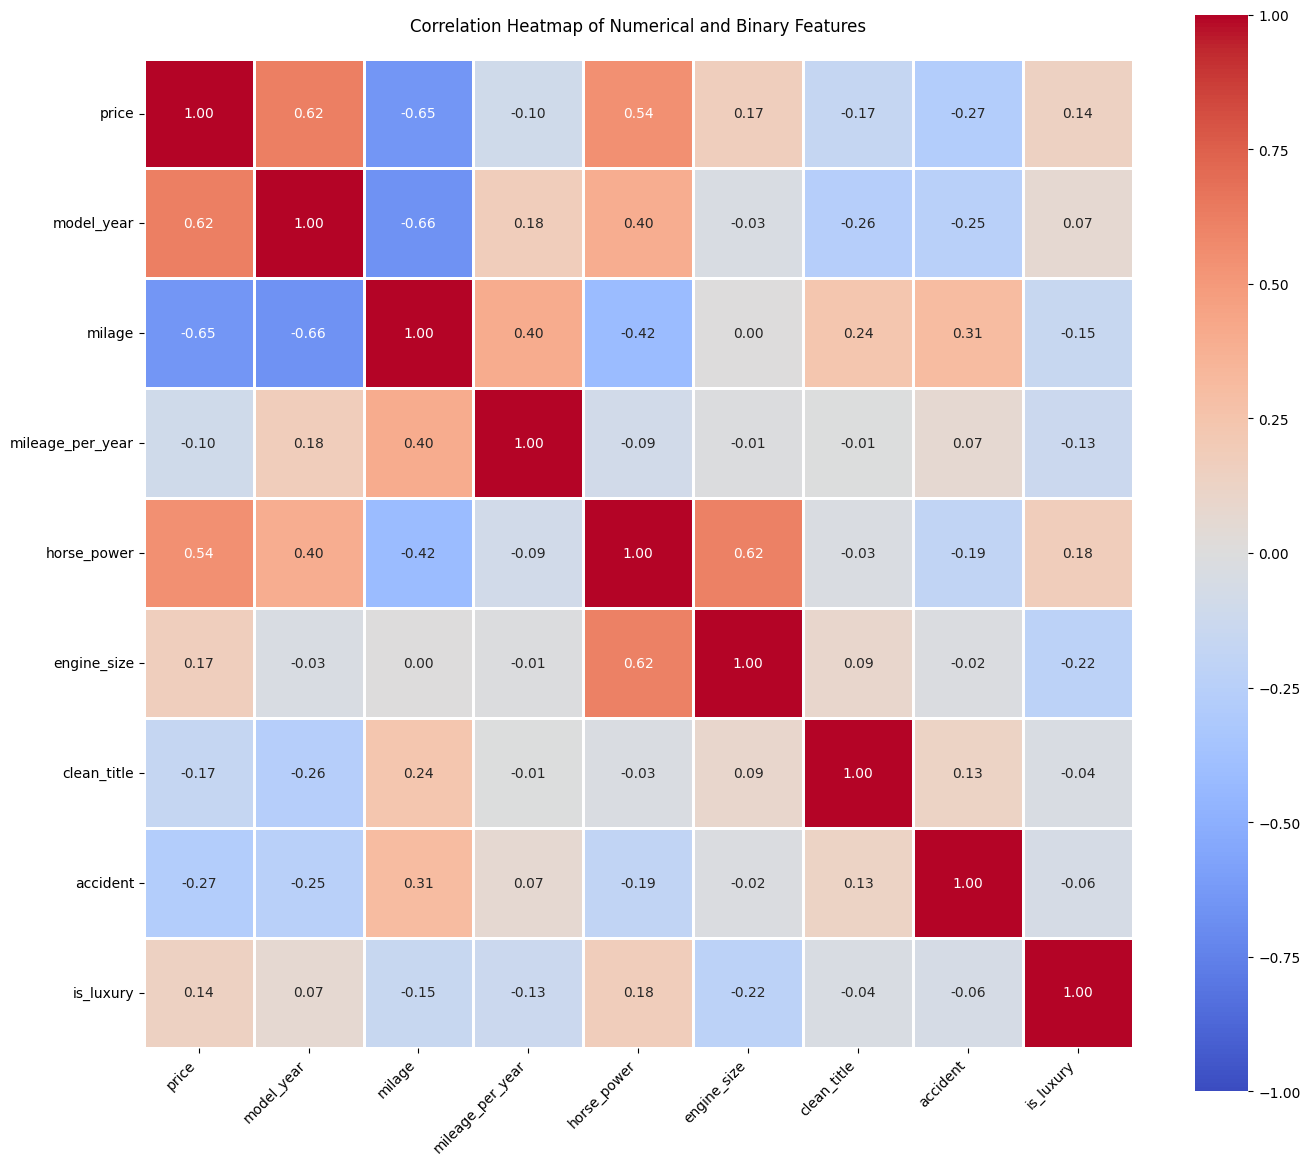

In [ ]:
#correlation heatmap
plt.figure(figsize=(14, 12))
numerical_columns = ['price', 'model_year', 'milage', 'mileage_per_year',
                    'horse_power', 'engine_size', 'clean_title', 'accident', 'is_luxury']
correlation_matrix = cleaned_df[numerical_columns].corr()
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            linewidths=1)

plt.title('Correlation Heatmap of Numerical and Binary Features', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Analysis**

  - Price shows strong positive correlation with model_year (0.62) and negative correlation with mileage (-0.65), confirming these as crucial predictive features.

  - Moreover, the complex interactions observed, such as between horsepower and engine_size (0.55), shows a complex feature space of correlations across different feature pairs.
  
  - These insights align with our later findings where ensemble methods like LightGBM and XGBoost outperformed simpler models, as they can effectively handle both strong and weak feature relationships.




#### 9. Handling Missing Values
- **Why?**
  - Missing values can cause issues during model training and evaluation. Imputing them ensures the dataset remains usable without significant bias.
- **How?**
  - For numerical features (`horse_power`, `engine_size`), missing values are filled with medians or grouped medians based on car brands.
  - For categorical features (`fuel_type`, `accident`), missing values are filled with the most common category.

---

In [ ]:
missing_values = cleaned_df.isna().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

fuel_type        808
engine           874
accident        2236
horse_power    29640
engine_size     6161
cylinders      13577
dtype: int64


In [ ]:
cleaned_df['fuel_type'] = cleaned_df['fuel_type'].fillna(cleaned_df['fuel_type'].mode()[0])
cleaned_df['accident'] = cleaned_df['accident'].fillna(0)
#Impute the missing horse_power values with the median of horse_power for that brand:
cleaned_df['horse_power'] = cleaned_df.groupby('brand')['horse_power'].transform(
    lambda x: x.fillna(x.median())
)
#Impute the missing engine_size values with the median of engine_size for that brand:
cleaned_df['engine_size'] = cleaned_df.groupby('brand')['engine_size'].transform(
    lambda x: x.fillna(x.median())
)

The only car model with empty horse power is Bugatti Veyron 16.4 Grand Sport, which is a rare luxary car. The horse power of this model searched on the Internet is 1001 hp, so we manually fill this empty value.

In [ ]:
cleaned_df['horse_power'] = cleaned_df['horse_power'].fillna(1001)

In [ ]:
#Fill the missing values for cylinders

#For electric cars, impute the missing cylinders with 0
cleaned_df.loc[cleaned_df['fuel_type'] == 'Electric', 'cylinders'] = 0

#For remaining cars, impute based on the engine_size based on the following rules:
def impute_cylinders(row):
    if pd.isna(row['cylinders']):
        if row['engine_size'] < 2.0:
            return 4  # Common for small engines
        elif row['engine_size'] < 4.0:
            return 6  # Common for mid-size engines
        else:
            return 8  # Common for larger engines
    return row['cylinders']

cleaned_df['cylinders'] = cleaned_df.apply(impute_cylinders, axis=1)

In [ ]:
#Exclude these columns
columns_drop = ['id','model','engine','transmission','ext_col','int_col','age']
cleaned_df = cleaned_df.drop(columns=columns_drop)

In [ ]:
#Reorder and rename the columnms
cleaned_df = cleaned_df.rename(columns={
    'transmission_cleaned': 'transmission',
    'ext_col_cleaned': 'ext_col',
    'int_col_cleaned': 'int_col'
})
cleaned_df = cleaned_df[['brand', 'is_luxury', 'model_year', 'milage', 'mileage_per_year', 'fuel_type',
                        'horse_power', 'engine_size', 'cylinders', 'transmission', 'accident',
                        'clean_title', 'ext_col', 'int_col', 'price']]

In [ ]:
#Final dataframe
cleaned_df.head()

,brand,is_luxury,model_year,milage,mileage_per_year,fuel_type,horse_power,engine_size,cylinders,transmission,accident,clean_title,ext_col,int_col,price
0,MINI,1,2007,213000,12529.411765,Gasoline,172.0,1.6,4,Automatic,0.0,1,Yellow,Gray,4200
1,Lincoln,1,2002,143250,6511.363636,Gasoline,252.0,3.9,8,Automatic,1.0,1,Silver,Beige,4999
2,Chevrolet,0,2002,136731,6215.045455,E85 Flex Fuel,320.0,5.3,8,Automatic,0.0,1,Blue,Gray,13900
3,Genesis,1,2017,19500,2785.714286,Gasoline,420.0,5.0,8,Automatic,0.0,1,Black,Black,45000
4,Mercedes-Benz,1,2021,7388,2462.666667,Gasoline,208.0,2.0,4,Automatic,0.0,1,Black,Beige,97500


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177653 entries, 0 to 188532
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   brand             177653 non-null  object 
 1   is_luxury         177653 non-null  int64  
 2   model_year        177653 non-null  int64  
 3   milage            177653 non-null  int64  
 4   mileage_per_year  177653 non-null  float64
 5   fuel_type         177653 non-null  object 
 6   horse_power       177653 non-null  float64
 7   engine_size       177653 non-null  float64
 8   cylinders         177653 non-null  int64  
 9   transmission      177653 non-null  object 
 10  accident          177653 non-null  float64
 11  clean_title       177653 non-null  int64  
 12  ext_col           177653 non-null  object 
 13  int_col           177653 non-null  object 
 14  price             177653 non-null  int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 21.7+ MB


#### 10. Encoding Categorical variables

In [ ]:
encoded_df = cleaned_df.copy()

First we want to encode the 'brand' column. Since 'brand' has high cardinality, we can do target encoding to this column by replacing this feature by the average value of the target (price)

In [ ]:
# Calculate the mean price for each brand
brand_means = cleaned_df.groupby('brand')['price'].mean()
# Map the mean price back to the original dataframe for target encoding
encoded_df['brand'] = encoded_df['brand'].map(brand_means)

Second, we want to do one-hot encoding for some nominal categorical variables: fuel_type, ext_col, int_col, and transmission.

One variable that needs additional consideration is the cylinders. By observing the results below, we can see that there's no linear relationship between number of cylinders and the average price. Also, cars with 0 cylinder, as defined before, are electric cars, which should be considered independent from the gasoline cars. Thus, we will also use one-hot encoding for cylinders. The tree-based models like Random Forest and XGBoost can handle categorical splits effectively and capture the variance.

In [ ]:
encoded_df.groupby('cylinders').agg(mean_price=('price', 'mean'), count=('price', 'count'))

,mean_price,count
cylinders,,
0,45183.662441,7178
3,34732.405970,335
4,25028.865704,33441
5,16112.467742,620
6,32725.223852,77301
8,37511.797715,56816
10,37675.431472,788
12,51701.099659,1174


In [ ]:
encoded_df = pd.get_dummies(encoded_df,
                            columns=['fuel_type','cylinders', 'ext_col', 'int_col', 'transmission'],
                            prefix=['fuel', 'cyl', 'ext', 'int', 'trans'],
                            drop_first=True)

In [ ]:
encoded_df.head()

,brand,is_luxury,model_year,milage,mileage_per_year,horse_power,engine_size,accident,clean_title,price,...,int_Orange,int_Other,int_Purple,int_Red,int_Silver,int_White,int_Yellow,trans_CVT,trans_Manual,trans_Other
0,16660.457547,1,2007,213000,12529.411765,172.0,1.6,0.0,1,4200,...,False,False,False,False,False,False,False,False,False,False
1,27442.575821,1,2002,143250,6511.363636,252.0,3.9,1.0,1,4999,...,False,False,False,False,False,False,False,False,False,False
2,34270.901130,0,2002,136731,6215.045455,320.0,5.3,0.0,1,13900,...,False,False,False,False,False,False,False,False,False,False
3,41040.265487,1,2017,19500,2785.714286,420.0,5.0,0.0,1,45000,...,False,False,False,False,False,False,False,False,False,False
4,38065.622960,1,2021,7388,2462.666667,208.0,2.0,0.0,1,97500,...,False,False,False,False,False,False,False,False,False,False


# Part 3: Hypothesis Testing

## 3.1 Hypothesis: Price Premium Hypothesis - Do neutral colors command higher prices?

H0: There is no significant difference in prices between cars with neutral colors (Black, White, Silver, Gray) and vibrant colors

H1: Cars with neutral colors have significantly different prices compared to cars with vibrant colors



In [ ]:
hypothesis_df = cleaned_df.copy()

def simplify_colors(color):
    if color in ['Black', 'White', 'Silver', 'Gray']:
        return 'Neutral'
    else:
        return 'Colored'

hypothesis_df['ext_col_simple'] = hypothesis_df['ext_col'].apply(simplify_colors)
hypothesis_df['int_col_simple'] = hypothesis_df['int_col'].apply(simplify_colors)
hypothesis_df['matching_colors'] = (hypothesis_df['ext_col_simple'] ==
                                     hypothesis_df['int_col_simple'])


ext_color_dummies = pd.get_dummies(hypothesis_df['ext_col_simple'], prefix='ext')
int_color_dummies = pd.get_dummies(hypothesis_df['int_col_simple'], prefix='int')

Price Test - Neutral vs. Colored:
t-statistic: 19.9896
p-value: 8.50e-89
Mean neutral price: $33,895.82
Mean colored price: $31,314.07


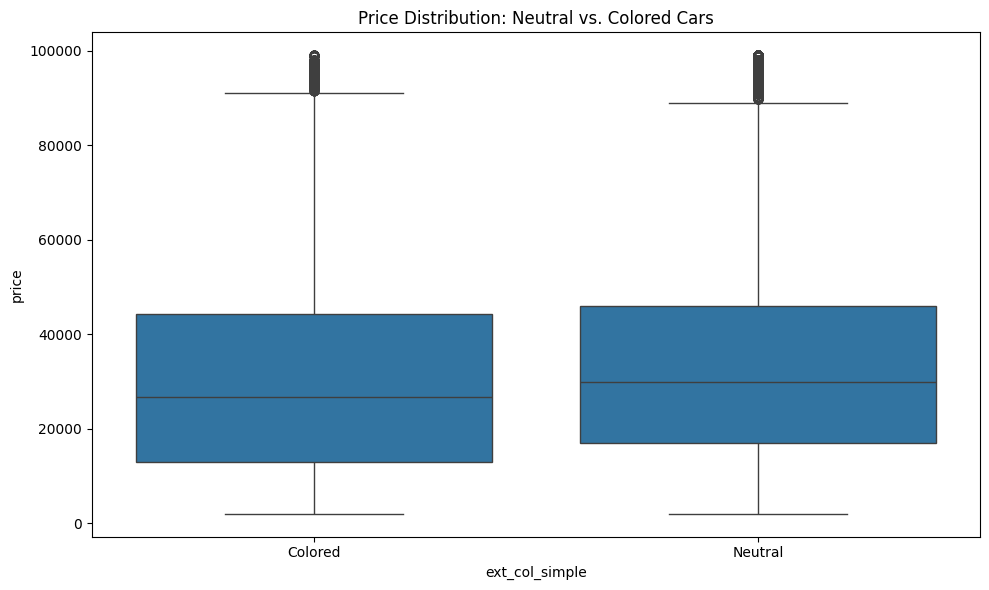

In [ ]:
neutral_prices = hypothesis_df[hypothesis_df['ext_col_simple'] == 'Neutral']['price']
colored_prices = hypothesis_df[hypothesis_df['ext_col_simple'] == 'Colored']['price']

t_stat, p_value = stats.ttest_ind(neutral_prices, colored_prices)
print("Price Test - Neutral vs. Colored:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.2e}")
print(f"Mean neutral price: ${neutral_prices.mean():,.2f}")
print(f"Mean colored price: ${colored_prices.mean():,.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x='ext_col_simple', y='price', data=hypothesis_df)
plt.title('Price Distribution: Neutral vs. Colored Cars')
plt.tight_layout()
plt.show()

###Analysis:
Based on the statistical analysis comparing car prices between neutral and colored vehicles, we reject the null hypothesis as there is a significant price difference between the two groups (p-value = 8.50e-89 < 0.05). This is supported by the distinct difference in mean prices (neutral: 33,895.82 vs. colored: 31,314.07) and the large t-statistic (19.9896). The box plot visualization further confirms this conclusion, showing a clear separation in price distributions between neutral and colored categories. This suggests that the choice of exterior color does meaningfully impact a vehicle's price in the market, with neutral colors commanding a premium of approximately $2,500 over vibrant colors.


## 3.2 Hypothesis: Impact of Matching Colors on Vehicle Price - If matching interior-exterior colors affects vehicle prices.
H0: There is no significant difference in prices between cars with matching and non-matching colors

H1: Cars with matching interior-exterior colors have significantly different prices



Matching Colors Price Test Results:
t-statistic: 8.6806
p-value: 3.97e-18

Mean price (matching): $33,698.64
Mean price (non-matching): $32,744.98
Price difference: $953.66 (2.91%)


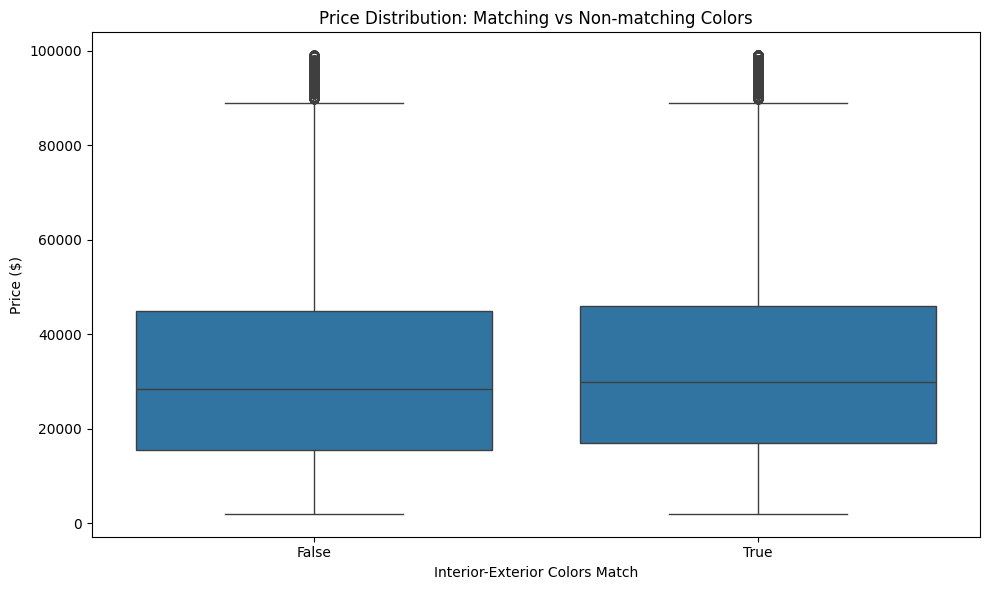

In [ ]:
matching_prices = hypothesis_df[hypothesis_df['matching_colors']]['price']
non_matching_prices = hypothesis_df[~hypothesis_df['matching_colors']]['price']

t_stat, p_value = stats.ttest_ind(matching_prices, non_matching_prices)

mean_matching = matching_prices.mean()
mean_non_matching = non_matching_prices.mean()
price_difference = mean_matching - mean_non_matching
price_difference_pct = (price_difference / mean_non_matching) * 100

print("Matching Colors Price Test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.2e}")
print(f"\nMean price (matching): ${mean_matching:,.2f}")
print(f"Mean price (non-matching): ${mean_non_matching:,.2f}")
print(f"Price difference: ${price_difference:,.2f} ({price_difference_pct:.2f}%)")

plt.figure(figsize=(10, 6))
sns.boxplot(x='matching_colors', y='price', data=hypothesis_df)
plt.title('Price Distribution: Matching vs Non-matching Colors')
plt.xlabel('Interior-Exterior Colors Match')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

### Analysis:
We reject the null hypothesis as there is a significant difference in prices between the two groups (p-value = 3.97e-18 < 0.05). This is supported by the clear difference in mean prices (matching: 33,698.64 vs. non-matching: 32,744.98), with matching colors commanding a price premium of $953.66 (2.91%), and a substantial t-statistic (8.6806). The box plot visualization further confirms this conclusion, showing similar distribution patterns but with consistently higher prices for vehicles with matching interior-exterior colors. This suggests that color coordination between interior and exterior does have a small but statistically significant positive impact on a vehicle's market price.

# Part 4: Models

## Model 1: Linear Regression (Baseline Model)

First we will try a linear regression model on the encoded data.

In [ ]:
X_enc = encoded_df.drop(columns=['price'])
y_enc = encoded_df['price']
# Train-test split
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42)

In [ ]:
# Fit the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_enc, y_train_enc)

# Predictions
y_pred_train = lr_model.predict(X_train_enc)
y_pred_test = lr_model.predict(X_test_enc)

# Evaluation Metrics
train_mae = mean_absolute_error(y_train_enc, y_pred_train)
test_mae = mean_absolute_error(y_test_enc, y_pred_test)

train_mse = mean_squared_error(y_train_enc, y_pred_train)
test_mse = mean_squared_error(y_test_enc, y_pred_test)

train_r2 = r2_score(y_train_enc, y_pred_train)
test_r2 = r2_score(y_test_enc, y_pred_test)

train_rmse = np.sqrt(mean_squared_error(y_train_enc, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test_enc, y_pred_test))

# Display Results
evaluation_results = {
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R²": train_r2,
    "Test R²": test_r2,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse
}
evaluation_results

{'Train MAE': 10704.886003967635,
 'Test MAE': 10697.891991959174,
 'Train MSE': 205911209.8317906,
 'Test MSE': 204411962.53501284,
 'Train R²': 0.5520009800388459,
 'Test R²': 0.5478818761858424,
 'Train RMSE': 14349.606608955892,
 'Test RMSE': 14297.271156938055}

## Model 2: Random Forest

Then we try a Random Forest model on the encoded data.

In [ ]:
# Train the Random Forest model
random_forest = RandomForestRegressor(random_state=42, n_estimators=100,
                                      max_depth=10, max_features='sqrt',
                                      min_samples_leaf=5)
random_forest.fit(X_train_enc, y_train_enc)

# Predictions
y_train_pred = random_forest.predict(X_train_enc)
y_test_pred = random_forest.predict(X_test_enc)

# Evaluation Metrics
train_mae = mean_absolute_error(y_train_enc, y_train_pred)
test_mae = mean_absolute_error(y_test_enc, y_test_pred)

train_mse = mean_squared_error(y_train_enc, y_train_pred)
test_mse = mean_squared_error(y_test_enc, y_test_pred)

train_r2 = r2_score(y_train_enc, y_train_pred)
test_r2 = r2_score(y_test_enc, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train_enc, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_enc, y_test_pred))

# Display Results
evaluation_results = {
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R²": train_r2,
    "Test R²": test_r2,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse
}
evaluation_results

{'Train MAE': 9531.134858211863,
 'Test MAE': 9615.14705468921,
 'Train MSE': 174830176.0317962,
 'Test MSE': 176760477.19253543,
 'Train R²': 0.6196236834999727,
 'Test R²': 0.6090413969823525,
 'Train RMSE': 13222.336254678905,
 'Test RMSE': 13295.129829848802}

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_enc.columns,
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
3,milage,3.351392e-01
2,model_year,2.898221e-01
5,horse_power,1.601143e-01
4,mileage_per_year,5.375956e-02
7,accident,3.350469e-02
0,brand,3.311284e-02
6,engine_size,2.320992e-02
15,cyl_4,1.377593e-02
8,clean_title,1.312975e-02
1,is_luxury,8.433803e-03


## Model 3: XGBoost

### Model 3.1: XGBoost on original data (with unencoded categorical variables)

In [ ]:
cat_df = cleaned_df.copy()

In [ ]:
# Convert categorical columns to the category type
categorical_cols = ['brand', 'fuel_type', 'ext_col', 'int_col', 'transmission']
for col in categorical_cols:
    cat_df[col] = cat_df[col].astype('category')

X = cat_df.drop(['price'], axis=1)
y = cat_df['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define XGBoost DMatrix, enabling categorical features
train_dmatrix = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
test_dmatrix = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Define the model and parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'lambda': 1,  # L2 regularization
    'alpha': 0,  # L1 regularization
    'eval_metric': 'rmse',
    'tree_method': 'hist',
}

# Train the model
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100, evals=[(train_dmatrix, 'train'), (test_dmatrix, 'eval')], verbose_eval=10)

# Predict on train and test data
y_train_pred = xgb_model.predict(train_dmatrix)
y_test_pred = xgb_model.predict(test_dmatrix)

# Evaluation Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train_enc, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_enc, y_test_pred))
# Display Results
evaluation_results = {
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R²": train_r2,
    "Test R²": test_r2,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse
}
evaluation_results

[0]	train-rmse:20173.25393	eval-rmse:20006.48137
[10]	train-rmse:14271.55413	eval-rmse:14203.69456
[20]	train-rmse:13170.52860	eval-rmse:13165.03442
[30]	train-rmse:12914.94772	eval-rmse:12971.45980
[40]	train-rmse:12813.53332	eval-rmse:12923.59149
[50]	train-rmse:12748.99481	eval-rmse:12907.70438
[60]	train-rmse:12692.78304	eval-rmse:12896.26268
[70]	train-rmse:12645.88864	eval-rmse:12888.19888
[80]	train-rmse:12604.96888	eval-rmse:12880.42767
[90]	train-rmse:12563.01013	eval-rmse:12875.70212
[99]	train-rmse:12535.61042	eval-rmse:12872.71936


{'Train MAE': 8885.877219404945,
 'Test MAE': 9132.276955348521,
 'Train MSE': 157141528.6794096,
 'Test MSE': 165706903.68728283,
 'Train R²': 0.6581087017987879,
 'Test R²': 0.633489677076433,
 'Train RMSE': 12535.610423087086,
 'Test RMSE': 12872.71935867798}

In [ ]:
feature_importance = xgb_model.get_score(importance_type='weight')

# Convert it to a sorted dataframe for better visualization
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
0,brand,1502.0
2,milage,873.0
5,horse_power,708.0
11,ext_col,616.0
1,model_year,576.0
3,mileage_per_year,453.0
12,int_col,452.0
6,engine_size,331.0
4,fuel_type,107.0
10,clean_title,72.0


### Model 3.2 XGBoost on encoded data

In [ ]:
# Define the model parameters
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 6,
    'lambda': 1,  # L2 regularization
    'alpha': 0,  # L1 regularization
    'eval_metric': 'rmse',
    'tree_method': 'hist',
}

# Define DMatrix for train and test data
train_dmatrix = xgb.DMatrix(X_train_enc, label=y_train_enc)
test_dmatrix = xgb.DMatrix(X_test_enc, label=y_test_enc)

# Train the XGBoost model
xgb_model_enc = xgb.train(params, train_dmatrix, num_boost_round=100, evals=[(train_dmatrix, 'train'), (test_dmatrix, 'eval')], verbose_eval=10)

# Predict on train and test data
y_train_pred = xgb_model_enc.predict(train_dmatrix)
y_test_pred = xgb_model_enc.predict(test_dmatrix)

# Evaluation Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train_enc, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_enc, y_test_pred))

# Display Results
evaluation_results = {
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R²": train_r2,
    "Test R²": test_r2,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse
}
evaluation_results

[0]	train-rmse:20179.78511	eval-rmse:20015.60298
[10]	train-rmse:14341.47767	eval-rmse:14262.63569
[20]	train-rmse:13267.29352	eval-rmse:13237.10544
[30]	train-rmse:13024.77214	eval-rmse:13041.79849
[40]	train-rmse:12930.17835	eval-rmse:12981.47970
[50]	train-rmse:12864.56679	eval-rmse:12951.78781
[60]	train-rmse:12812.96196	eval-rmse:12932.55477
[70]	train-rmse:12776.41083	eval-rmse:12919.19093
[80]	train-rmse:12741.40443	eval-rmse:12910.96885
[90]	train-rmse:12709.27212	eval-rmse:12902.40350
[99]	train-rmse:12688.24056	eval-rmse:12897.85430


{'Train MAE': 8998.825382840507,
 'Test MAE': 9158.502716048133,
 'Train MSE': 160991448.6785135,
 'Test MSE': 166354645.3578455,
 'Train R²': 0.649732468237068,
 'Test R²': 0.6320570028572767,
 'Train RMSE': 12688.240566702441,
 'Test RMSE': 12897.854292782404}

In [ ]:
feature_importance = xgb_model_enc.get_score(importance_type='weight')

# Convert it to a sorted dataframe for better visualization
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
3,milage,1021.0
5,horse_power,939.0
0,brand,732.0
2,model_year,695.0
4,mileage_per_year,565.0
6,engine_size,505.0
1,is_luxury,101.0
7,accident,86.0
8,clean_title,82.0
47,trans_Manual,73.0


## Model 4: LightGBM

### Model 4.1: LightGBM on original data (with unencoded categorical variables)

In [ ]:
# Create LightGBM datasets, specifying categorical features
train_data = lgbm.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
test_data = lgbm.Dataset(X_test, label=y_test, categorical_feature=categorical_cols, reference=train_data)

# Define the parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'max_depth': -1,
    'lambda_l1': 0,
    'lambda_l2': 1,
    'verbose': -1
}

# Train the model
lgbm_model = lgbm.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data]
)

# Predictions
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = lgbm_model.predict(X_test)

# Evaluation Metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_rmse = np.sqrt(mean_squared_error(y_train_enc, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_enc, y_test_pred))

evaluation_results = {
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R²": train_r2,
    "Test R²": test_r2,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse
}
print("LightGBM Model (with categorical features):")
evaluation_results


LightGBM Model (with categorical features):


{'Train MAE': 9013.228890658427,
 'Test MAE': 9140.581499579916,
 'Train MSE': 161872899.64110628,
 'Test MSE': 165767100.4134689,
 'Train R²': 0.647814703936096,
 'Test R²': 0.6333565340325256,
 'Train RMSE': 12722.928107990954,
 'Test RMSE': 12875.057297482947}

In [ ]:
feature_importance = lgbm_model.feature_importance(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(X_train.columns),
    'Importance': list(feature_importance)
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance for unencoded data:")
print(importance_df)


Feature Importance for unencoded data:
             Feature    Importance
3             milage  1.087819e+14
2         model_year  7.747791e+13
6        horse_power  2.220410e+13
0              brand  7.374190e+12
7        engine_size  3.675974e+12
4   mileage_per_year  7.606237e+11
12           ext_col  4.885408e+11
13           int_col  4.546279e+11
8          cylinders  4.011925e+11
10          accident  3.866046e+11
5          fuel_type  2.534970e+11
11       clean_title  2.505849e+11
9       transmission  1.181593e+11
1          is_luxury  3.857380e+09


### Model 4.2: LightGBM on encoded data

In [ ]:
train_data_enc = lgbm.Dataset(X_train_enc, label=y_train_enc)
test_data_enc = lgbm.Dataset(X_test_enc, label=y_test_enc, reference=train_data_enc)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': -1,
    'lambda_l1': 0,
    'lambda_l2': 1,
}

# Train the model
lgbm_model_enc = lgbm.train(
    params,
    train_data_enc,
    num_boost_round=100,
    valid_sets=[train_data_enc, test_data_enc]
)

# Predictions
y_train_pred = lgbm_model_enc.predict(X_train_enc)
y_test_pred = lgbm_model_enc.predict(X_test_enc)

# Evaluation Metrics
train_mae = mean_absolute_error(y_train_enc, y_train_pred)
test_mae = mean_absolute_error(y_test_enc, y_test_pred)
train_mse = mean_squared_error(y_train_enc, y_train_pred)
test_mse = mean_squared_error(y_test_enc, y_test_pred)
train_r2 = r2_score(y_train_enc, y_train_pred)
test_r2 = r2_score(y_test_enc, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train_enc, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test_enc, y_test_pred))
# Display Results
evaluation_results = {
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train R²": train_r2,
    "Test R²": test_r2,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse
}
print("LightGBM Model (with encoded features):")
evaluation_results


LightGBM Model (with encoded features):


{'Train MAE': 9077.519112062966,
 'Test MAE': 9179.472601827863,
 'Train MSE': 163887745.29729205,
 'Test MSE': 166897309.5017825,
 'Train R²': 0.6434310238048315,
 'Test R²': 0.6308567389804698,
 'Train RMSE': 12801.864914819718,
 'Test RMSE': 12918.87415767266}

In [ ]:
feature_importance = lgbm_model_enc.feature_importance(importance_type='gain')

importance_df = pd.DataFrame({
    'Feature': list(X_train_enc.columns),
    'Importance': list(feature_importance)
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
3,milage,1.088806e+14
2,model_year,7.733895e+13
5,horse_power,2.308946e+13
6,engine_size,4.230414e+12
0,brand,3.126748e+12
1,is_luxury,1.588466e+12
4,mileage_per_year,7.671530e+11
7,accident,3.918174e+11
8,clean_title,3.475158e+11
48,trans_Manual,1.526062e+11


## Model 5: Auto Modeling using PyCaret


## Why Choose PyCaret?

## Purpose of Using PyCaret
- **Automation**: PyCaret simplifies the end-to-end machine learning workflow, including data preprocessing, model selection, and hyperparameter tuning.
- **Model Comparison**: It allows us to quickly compare the performance of multiple regression algorithms (e.g., Linear Regression, Random Forest, XGBoost, LightGBM) in a single pipeline.
- **Hyperparameter Tuning**: PyCaret provides an automated way to fine-tune the best-selected model, optimizing its performance without manually specifying hyperparameter ranges.
- **Efficiency**: PyCaret significantly reduces the time and effort required for repetitive tasks, allowing us to focus on analyzing results and improving data quality.

## Expectations from PyCaret
1. **Identify the Best Model**:
   - Automatically select the algorithm that delivers the highest performance metrics (e.g., RMSE, R²).
2. **Optimize Model Performance**:
   - Tune the hyperparameters of the selected model to improve its generalization and accuracy.
3. **Reproducibility**:
   - Provide a consistent and reproducible pipeline for future experimentation and deployment.
4. **Baseline Benchmarking**:
   - Serve as a baseline for comparison with manual implementations to validate model choices and performance.

By using PyCaret, we aim to streamline the model-building process, identify the most effective algorithms for our dataset, and achieve strong predictive performance with minimal manual intervention.


In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.7 MB/s eta 0:00:00
   ━━━━

In [ ]:
train_data = X_train_enc.copy()
train_data['price'] = y_train_enc
regression_setup = setup(
    data=train_data,
    target='price',
    train_size=0.8,
    preprocess=False,
    data_split_shuffle=False,
    session_id=42
)

best_model = compare_models()

tuned_model = tune_model(
    best_model,
    optimize='RMSE',
    custom_grid={
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [-1, 10, 20],
        'num_leaves': [31, 50, 100],
        'lambda_l1': [0, 0.01, 0.1],
        'lambda_l2': [0, 0.1, 1]
    }
)

save_model(tuned_model, 'best_price_prediction_model')
print("Best-tuned model saved as 'best_price_prediction_model.pkl'")

y_train_pred = tuned_model.predict(X_train_enc)
y_test_pred = tuned_model.predict(X_test_enc)

train_mae = mean_absolute_error(y_train_enc, y_train_pred)
test_mae = mean_absolute_error(y_test_enc, y_test_pred)

train_mse = mean_squared_error(y_train_enc, y_train_pred)
test_mse = mean_squared_error(y_test_enc, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train_enc, y_train_pred)
test_r2 = r2_score(y_test_enc, y_test_pred)

evaluation_results = {
    "Train MAE": train_mae,
    "Test MAE": test_mae,
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Train RMSE": train_rmse,
    "Test RMSE": test_rmse,
    "Train R²": train_r2,
    "Test R²": test_r2
}

print("Evaluation Results for the Tuned Model:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(142122, 51)"
4,Transformed data shape,"(142122, 51)"
5,Transformed train set shape,"(113697, 51)"
6,Transformed test set shape,"(28425, 51)"
7,Numeric features,9


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9221.7739,170088818.9555,13041.5437,0.6296,0.4170,0.3742,3.5460
xgboost,Extreme Gradient Boosting,9219.1415,171059176.5939,13078.6708,0.6275,0.4163,0.3715,1.8500
gbr,Gradient Boosting Regressor,9353.1585,173598799.1567,13175.4046,0.6220,0.4229,0.3822,20.0940
rf,Random Forest Regressor,9645.5518,186298705.9306,13648.7201,0.5943,0.4299,0.3880,108.4240
lr,Linear Regression,10701.5976,205937789.6752,14350.1684,0.5516,0.5892,0.4734,1.1030
lasso,Lasso Regression,10702.1638,205938800.5685,14350.2042,0.5516,0.5905,0.4734,6.7330
ridge,Ridge Regression,10701.5541,205935726.3053,14350.0965,0.5516,0.5895,0.4734,0.2710
llar,Lasso Least Angle Regression,10702.1638,205938800.4691,14350.2042,0.5516,0.5905,0.4734,0.2720
br,Bayesian Ridge,10701.6808,205931373.5046,14349.9457,0.5516,0.5894,0.4733,0.6500
et,Extra Trees Regressor,10138.0987,206699985.6151,14376.4297,0.5499,0.4464,0.4034,107.7920


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9258.8505,172528863.0308,13135.0243,0.6299,0.4121,0.3684
1,9235.4592,172502240.9716,13134.0108,0.6300,0.4170,0.3731
2,9146.4721,167100707.1494,12926.7439,0.6363,0.4095,0.3636
3,9159.2281,167184215.9632,12929.9735,0.6306,0.4138,0.3711
4,9212.0989,170677850.4708,13064.3733,0.6287,0.4171,0.3740
5,9219.5943,172306883.1613,13126.5716,0.6241,0.4209,0.3771
6,9112.3236,168561860.9754,12983.1376,0.6318,0.4110,0.3642
7,9136.9071,168124935.5640,12966.3000,0.6361,0.4169,0.3738
8,9165.7153,168208162.2395,12969.5089,0.6297,0.4149,0.3718


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Transformation Pipeline and Model Successfully Saved
Best-tuned model saved as 'best_price_prediction_model.pkl'
Evaluation Results for the Tuned Model:
Train MAE: 8802.06075187162
Test MAE: 9125.27109217742
Train MSE: 153772627.30851385
Test MSE: 165901091.71734342
Train RMSE: 12400.509155212694
Test RMSE: 12880.25976901644
Train R²: 0.6654383878015072
Test R²: 0.6330601722337157


In [ ]:
print("Tuned Model Details:")
print(tuned_model)

Tuned Model Details:
LGBMRegressor(lambda_l1=0, lambda_l2=0, max_depth=10, n_jobs=-1, num_leaves=100,
              random_state=42)


# Conclusion and Discussion

---

## Key Takeaways

1. **Best Model**:
   - The **untuned LightGBM model with unencoded data** is the most efficient and effective choice.
   - It delivers strong performance (Train RMSE: ~12722, Test RMSE: ~12875) without unnecessary computational overhead.
   - LightGBM's ability to natively handle categorical data reduces the need for preprocessing, simplifying the pipeline.

2. **Impact of Encoding**:
   - Encoding categorical features did not universally improve performance.
   - For models like LightGBM and XGBoost, encoding introduced noise and marginally reduced their ability to capture complex feature interactions.

3. **Tree-Based Models**:
   - Models like Random Forest, XGBoost, and LightGBM outperform simpler models such as Linear Regression by effectively handling non-linear relationships and high-dimensional data.

4. **PyCaret's Role**:
   - PyCaret successfully identified LightGBM as the best-performing model.
   - However, its automated hyperparameter tuning introduced minor train performance improvements (Train RMSE: ~12400) but did not significantly enhance generalization to the test set (Test RMSE: ~12880).

---

## Implications of Modeling Results

### For Interpretable Models

1. **Feature Importance**:
   - Tree-based models like Random Forest and LightGBM provide interpretability through feature importance scores.
   - Insights into feature contributions can guide stakeholders (e.g., car dealers, manufacturers) to prioritize factors like mileage, brand, or accident history in pricing decisions.

### For Non-Interpretable Models

1. **Factors That Improved Model Performance**:
   - **Boosting Techniques**: XGBoost and LightGBM excelled due to iterative error correction and strong regularization.
   - **Native Categorical Handling**: LightGBM’s ability to process categorical features without encoding minimized data transformation errors.
   - **Hyperparameter Optimization**: While PyCaret's tuning brought marginal improvements, careful manual tuning could further optimize results.

2. **Why These Factors Matter**:
   - Boosting models iteratively refine their predictions, making them better suited to datasets with complex relationships.
   - Avoiding unnecessary encoding preserves feature relationships, particularly for models designed to handle raw data efficiently.

---

## Modeling Implications for Stakeholders

1. **Car Dealers and Manufacturers**:
   - Models like LightGBM can help predict car prices more accurately, incorporating factors like mileage, accident history, and brand.
   - Insights into feature importance (e.g., mileage and age) can inform pricing strategies and inventory planning.

2. **Data Analysts and Engineers**:
   - Efficient models with minimal preprocessing reduce deployment complexity.
   - Interpretable results aid in communicating insights to non-technical stakeholders.

---

## Model Limitations

1. **Data-Driven Challenges**:
   - Missing values and imbalanced distributions (e.g., certain brands or fuel types) limited model generalization.
   - Encoding categorical features, when unnecessary, occasionally degraded performance.

2. **Generalization Issues**:
   - Despite PyCaret’s hyperparameter tuning, test performance showed limited improvement, indicating the need for additional data or enhanced tuning strategies.

3. **Computational Cost**:
   - Boosting algorithms (e.g., XGBoost, LightGBM) require significant computational resources during hyperparameter tuning.

---

## Potential Improvements and Future Work

### Data Improvements

1. **Additional Features**:
   - Include more granular data such as location, market trends, or user reviews to improve predictions.
   - Explore detailed car specifications (e.g., safety features, fuel efficiency) as additional predictors.

2. **Address Data Gaps**:
   - Use advanced imputation techniques to handle missing values effectively.
   - Balance the dataset by ensuring even representation of underrepresented brands or fuel types.

### Model Enhancements

1. **Alternative Models**:
   - Test additional algorithms like CatBoost (known for handling categorical data) or neural networks for larger datasets.
   - Explore hybrid models combining boosting algorithms and interpretable regression methods.

2. **Improved Hyperparameter Tuning**:
   - Perform a custom manual grid search with finer granularity for boosting models.
   - Use Bayesian optimization or genetic algorithms to explore a wider hyperparameter space efficiently.

### Feature Engineering

- Focus on domain-specific transformations (e.g., log transformations for highly skewed variables like mileage).
- Derive new composite features, such as mileage per year or accident severity.

### Deployment Considerations

- Simplify preprocessing pipelines for deployment, leveraging models like LightGBM that minimize data transformations.
- Build interpretability dashboards to display key feature contributions for pricing decisions.